<a href="https://colab.research.google.com/github/nhlong1512/IS252.N21/blob/main/Lab2_Class_KTDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [3]:
df = pd.read_csv("online_retail.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
df['Description'] = df['Description'].str.strip()

In [9]:
df.dropna(axis=0,subset=['InvoiceNo'], inplace=True)
df['InvoiceNo'] = df['InvoiceNo'].astype('str')

In [10]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [11]:
df[df.InvoiceNo.str.contains('c', na=False)].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


<Axes: >

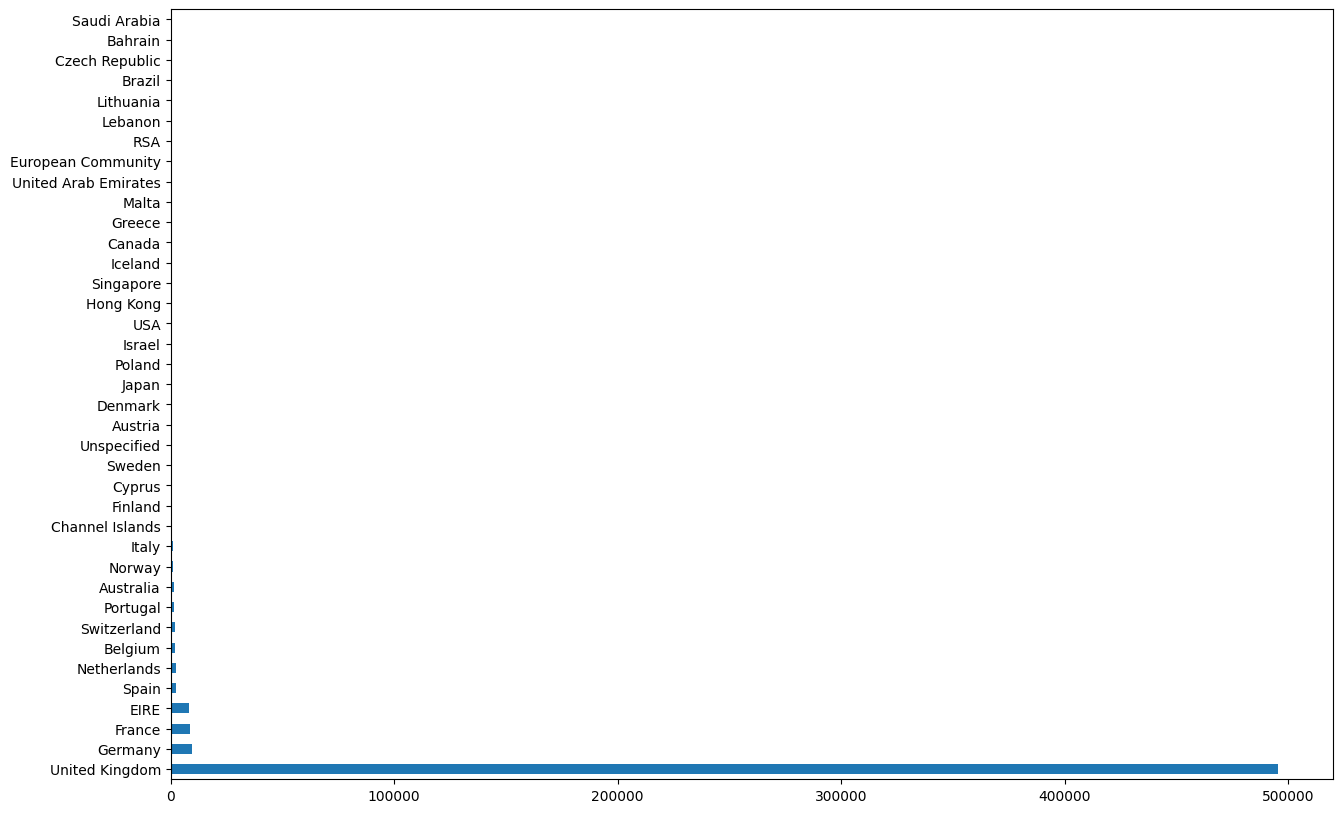

In [12]:
df['Country'].value_counts().plot(kind='barh', figsize=(15,10))

In [13]:
basket = df[df['Country'] == "United Kingdom"].groupby(['InvoiceNo', 'Description'])['Quantity']

In [14]:
basket = basket.sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')

In [15]:
basket.head(10)

Description,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536372,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536373,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536374,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
def encode_data(datapoint):
  if datapoint <= 0: 
    return 0
  if datapoint >=1:
    return 1

In [17]:
basket = basket.applymap(encode_data)

In [18]:
basket.drop('POSTAGE', inplace=True, axis = 1)

In [19]:
itemsets = apriori(basket, min_support=0.03, use_colnames=True)

In [20]:
itemsets.head(10)

,support,itemsets
0,0.038793,(6 RIBBONS RUSTIC CHARM)
1,0.034165,(60 TEATIME FAIRY CAKE CASES)
2,0.039746,(ALARM CLOCK BAKELIKE GREEN)
3,0.042196,(ALARM CLOCK BAKELIKE RED)
4,0.030672,(ANTIQUE SILVER T-LIGHT GLASS)
5,0.062205,(ASSORTED COLOUR BIRD ORNAMENT)
6,0.035799,(BAKING SET 9 PIECE RETROSPOT)
7,0.030581,(CHARLOTTE BAG PINK POLKADOT)
8,0.036479,(CHARLOTTE BAG SUKI DESIGN)
9,0.037205,(CHOCOLATE HOT WATER BOTTLE)


In [21]:
rules = association_rules(itemsets, metric="confidence", min_threshold=0.5)

In [22]:
rules.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         4 non-null      object 
 1   consequents         4 non-null      object 
 2   antecedent support  4 non-null      float64
 3   consequent support  4 non-null      float64
 4   support             4 non-null      float64
 5   confidence          4 non-null      float64
 6   lift                4 non-null      float64
 7   leverage            4 non-null      float64
 8   conviction          4 non-null      float64
dtypes: float64(7), object(2)
memory usage: 416.0+ bytes


In [23]:
rules["antecedents"] = rules["antecedents"].apply(lambda x: list(x)[0]).astype("unicode")
rules["consequents"] = rules["consequents"].apply(lambda x: list(x)[0]).astype("unicode")

In [26]:
for i in range(len(rules)):
  print(rules.loc[i, 'antecedents'],' ==>',rules.loc[i, "consequents"],
    ' [', rules.loc[i, 'support'], ', ', rules.loc[i, "confidence"], ']')

ROSES REGENCY TEACUP AND SAUCER  ==> GREEN REGENCY TEACUP AND SAUCER  [ 0.03180580762250454 ,  0.7324973876698014 ]
GREEN REGENCY TEACUP AND SAUCER  ==> ROSES REGENCY TEACUP AND SAUCER  [ 0.03180580762250454 ,  0.7505353319057816 ]
JUMBO BAG PINK POLKADOT  ==> JUMBO BAG RED RETROSPOT  [ 0.03561705989110708 ,  0.6773080241587575 ]
JUMBO STORAGE BAG SUKI  ==> JUMBO BAG RED RETROSPOT  [ 0.03166969147005445 ,  0.6176991150442478 ]


In [27]:
support=rules['support'].values
confidence=rules['confidence'].values

<Axes: title={'center': 'Association Rules'}, xlabel='support', ylabel='confidence'>

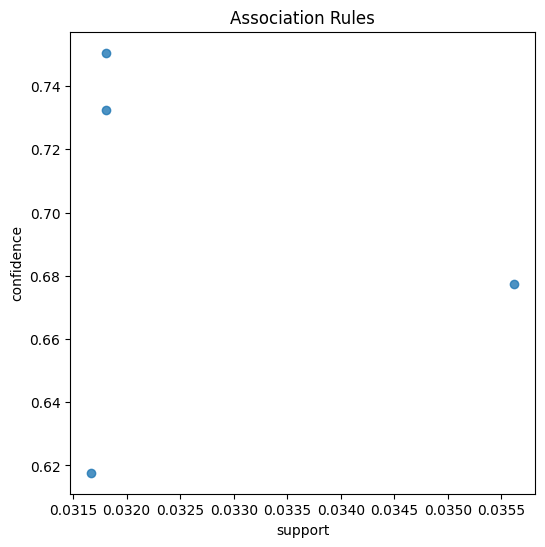

In [28]:
plt.figure(figsize = (6,6))
plt.title('Association Rules')
plt.xlabel('support')
plt.ylabel('confidence')
sns.regplot(x=support, y=confidence, fit_reg=False)

In [30]:
from mlxtend.frequent_patterns import fpgrowth
itemsets = fpgrowth(basket, min_support=0.03, use_colnames=True)

ImportError: ignored